# 動態網頁爬蟲 - 使用 Selenium

* 了解 Selenium 用於動態網頁爬蟲的原理
* 能夠使用 Selenium 撰寫動態網頁爬蟲

## 作業目標

* 1. 根據範例使用 selenuim 取出 Hahow 網站中所有課程的資料，並用一個適合的資料結構儲存（Hint: 將所有資料存在一個變數當中取出）
* 2. 剛剛的做法只能取出第一頁，試著取出所有頁面的資料。



### 1. 根據範例使用 selenuim 取出 Hahow 網站中所有課程的資料，並用一個適合的資料結構儲存（Hint: 將所有資料存在一個變數當中取出）

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup

browser = webdriver.Chrome(executable_path = 'chromedriver')
browser.get('https://hahow.in/courses')
time.sleep(3)

'<html lang="zh-TW" data-react-helmet="lang"><head><meta name="description" content="超過百堂有趣的線上課程，讓你輕鬆自學那些學校沒有教的事！" data-react-helmet="true"><meta property="fb:app_id" content="1287520191288194" data-react-helmet="true"><meta property="og:locale" content="zh-TW" data-react-helmet="true"><meta property="og:description" content="Hahow 提供最多元有趣的線上課程，並透過獨特的課程募資機制，讓熱愛自學與交換技能的你，在家就可以完成高效率的線上學習與成就！" data-react-helmet="true"><meta property="og:url" content="https://hahow.in/" data-react-helmet="true"><meta property="og:image" content="https://hahow.in/static/images/og-image.jpg" data-react-helmet="true"><meta property="og:type" content="article" data-react-helmet="true"><meta property="og:site_name" content="Hahow - 好學校" data-react-helmet="true"><meta property="og:title" content="Hahow 好學校 | 最有趣的線上課程平台 | 自學那些學校沒教的事" data-react-helmet="true"><meta name="google-site-verification" content="dxQXUxo-Ypo_w3JIINgVr9PJItIfniuKoi5FJ4LZFcU" data-react-helmet="true"><meta name="application-name" content="H
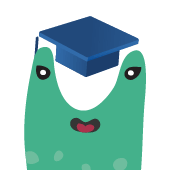

In [2]:
# 取得資料（等瀏覽器資料出現後才執行）
html_source = browser.page_source
html_source

In [3]:
# 取得資料
soup = BeautifulSoup(html_source, 'html.parser')

In [4]:
courses = []
    
for course in soup.find_all('h4', class_='title marg-t-20 marg-b-10'):
    courses.append(course.text)

print(courses)

['從零開始，Unity3D 射擊遊戲製作真簡單', '手繪珠寶設計入門：完成你的第一件珠寶設計', '職場寫作課：從個人品牌到自媒體', '新鮮人用設計思考寫出好履歷', '紙上的美妝師：連禾時尚彩妝畫', '顧客分類大師：Python x RFM 會員經營新觀點', '翻轉文字：給孩子好玩的創意寫作課！', '大人的蠟筆畫：活用油畫知識，寫實生活微光', '機器學習攻略：實戰心法到求職技巧', '法式甜點在地魂製作攻略－日日在家菓實日', '林長揚職場簡報術：一次搞定所有工作簡報！', '概念式時尚插畫｜我的小小時裝週', '羅寶鴻的安定教養課：12 個對話練習與心法', '七日減醣計畫「一週持續執行！」邊吃邊享瘦', '閱讀攝影的眼神 - 啟動你的影像理解力', '手機 App 開發入門：App Inventor 2 實作', '全民防疫通識課：陳建仁副總統來開講', '省錢攝影術：零基礎拍好美食＆商品！', 'Linux 我來教: CentOS/ RHEL 8 新世代雲端', '口譯員浩爾的打獵式聆聽＆資訊處理術', '資料變決策！從零上手 Tableau 大數據視覺化', '互動藝術程式創作入門 Creative Coding ', '人生管理學：把自己當成公司經營', '薩克斯風 - 13 堂基本功吹出專輯的美聲']


In [5]:
browser.close()

### 2. 剛剛的做法只能取出第一頁，試著取出所有頁面的資料。

In [20]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import time

browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://hahow.in/courses")
time.sleep(3)

In [21]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')

In [22]:
# 1. 先取出全部有幾頁
    
p = soup.find_all('li', class_='rc-pagination-item')[-1].text
print(p)

20


In [23]:
# 2. 每頁都取出資料放入 courses

courses = []
for i in range(1, int(p)+1) [:2]:
    browser.get('https://hahow.in/courses?page=' + str(i) )
    time.sleep(2)
    
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html.parser')
    
    for course in soup.find_all('h4', class_='title marg-t-20 marg-b-10'):
        courses.append(course.text)
    
browser.close()

In [24]:
# 3. done!

print(courses)

['從零開始，Unity3D 射擊遊戲製作真簡單', '手繪珠寶設計入門：完成你的第一件珠寶設計', '職場寫作課：從個人品牌到自媒體', '新鮮人用設計思考寫出好履歷', '紙上的美妝師：連禾時尚彩妝畫', '顧客分類大師：Python x RFM 會員經營新觀點', '翻轉文字：給孩子好玩的創意寫作課！', '大人的蠟筆畫：活用油畫知識，寫實生活微光', '機器學習攻略：實戰心法到求職技巧', '法式甜點在地魂製作攻略－日日在家菓實日', '林長揚職場簡報術：一次搞定所有工作簡報！', '概念式時尚插畫｜我的小小時裝週', '羅寶鴻的安定教養課：12 個對話練習與心法', '七日減醣計畫「一週持續執行！」邊吃邊享瘦', '閱讀攝影的眼神 - 啟動你的影像理解力', '手機 App 開發入門：App Inventor 2 實作', '全民防疫通識課：陳建仁副總統來開講', '省錢攝影術：零基礎拍好美食＆商品！', 'Linux 我來教: CentOS/ RHEL 8 新世代雲端', '口譯員浩爾的打獵式聆聽＆資訊處理術', '資料變決策！從零上手 Tableau 大數據視覺化', '互動藝術程式創作入門 Creative Coding ', '人生管理學：把自己當成公司經營', '薩克斯風 - 13 堂基本功吹出專輯的美聲', '用實際案例學設計-美編的 InDesign 排版課', '動盪時代的資產配置：王伯達人生財務規劃學', '手繪轉電繪，我選 Procreate！', '氣球達人不藏私！宋俊霖的塞球雕塑造型課', '0-2 歲寶寶父母必修課 - 專業治療師開課囉！', '一支手機拍完行銷影片，產品賣更好！', 'Keynote即戰力：簡報製作到上台演講都搞定', '輕鬆學好道地美式發音！', '資料科學：Azure 機器學習工作室入門', '話聊庶務課－探索你說話的個人風格', '新手上路必學：電商人才求職全攻略！', 'Office論文格式技巧：高效編輯專業文件', '蝦皮個人賣家行銷術：突破網拍初期盲點  ', 'ZBrush 201 從初階到高階 - 隱藏密技大公開', 'PHP 攻略：Laravel 5.8 從入門到實務', '成功前進科技巨頭，百萬年薪面試術！', 'Github 免費架站術！輕鬆打造個人品牌', '網美咖啡廳在你家，九款鏡面蛋糕